<a href="https://colab.research.google.com/github/ProtikNag/Wifire-Test-Project/blob/master/Wifire_image_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Step 1 part 1: connect to drive
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

E: Package 'python-software-properties' has no installation candidate
Selecting previously unselected package libfuse2:amd64.
(Reading database ... 22280 files and directories currently installed.)
Preparing to unpack .../libfuse2_2.9.7-1ubuntu1_amd64.deb ...
Unpacking libfuse2:amd64 (2.9.7-1ubuntu1) ...
Selecting previously unselected package fuse.
Preparing to unpack .../fuse_2.9.7-1ubuntu1_amd64.deb ...
Unpacking fuse (2.9.7-1ubuntu1) ...
Selecting previously unselected package google-drive-ocamlfuse.
Preparing to unpack .../google-drive-ocamlfuse_0.7.0-0ubuntu1~ubuntu18.04.1_amd64.deb ...
Unpacking google-drive-ocamlfuse (0.7.0-0ubuntu1~ubuntu18.04.1) ...
Setting up libfuse2:amd64 (2.9.7-1ubuntu1) ...
Processing triggers for libc-bin (2.27-3ubuntu1) ...
Setting up fuse (2.9.7-1ubuntu1) ...
Setting up google-drive-ocamlfuse (0.7.0-0ubuntu1~ubuntu18.04.1) ...
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleus

In [0]:
!mkdir -p drive
!google-drive-ocamlfuse drive

In [0]:
import sys
sys.path.append('drive/WIFIRE_TEST')

In [0]:
import numpy as np
import scipy.misc
from scipy import misc
import matplotlib.pyplot as plt

In [6]:
from skimage import data
photo_data = misc.imread('drive/WIFIRE_TEST/wifire/sd-3layers.jpg')
type(photo_data)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  


numpy.ndarray

Let's show the image here.

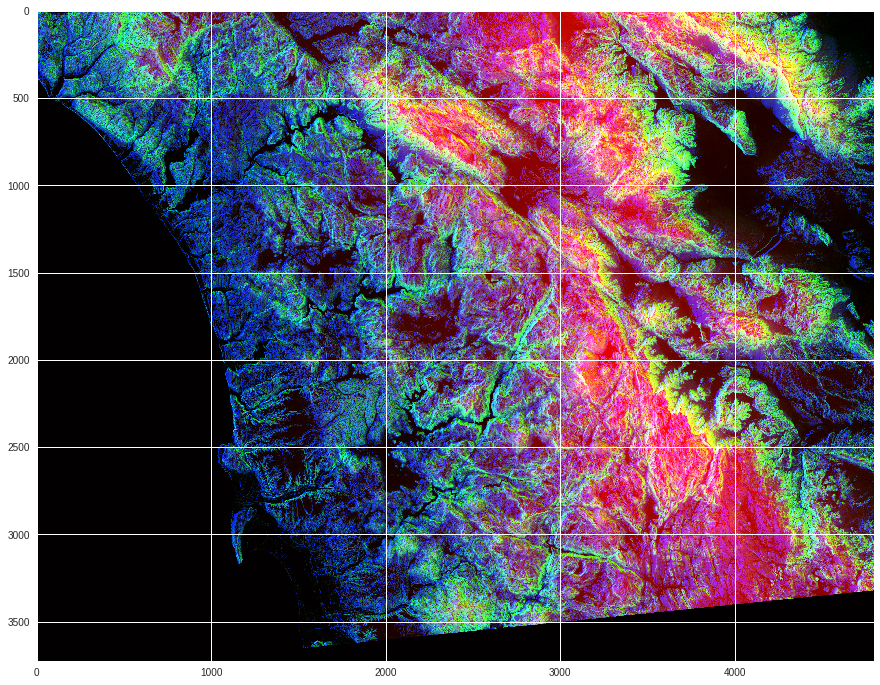

In [7]:
plt.figure(figsize=(15,15))
plt.imshow(photo_data)

Now we are going to print the details about this image. 

In [8]:
print(photo_data.shape)

(3725, 4797, 3)


Here first data shows the height of the image, second one is for width and the last one is for the layers(RGB).

Let's print the photo_data size

In [9]:
print(photo_data.size)

53606475


Now this function will provide the information of the minimum and maximum pixel of this image

In [10]:
print(photo_data.min())
print(photo_data.max())

0
255


The **Mean** of all pixel values.

In [11]:
photo_data.mean()

75.8299354508947

Pixel on the 150th Row and 250th Column

In [12]:
photo_data[150,250]

array([ 17,  35, 255], dtype=uint8)

If we want to know the value of red in the [150,250]th pixel : 

In [13]:
photo_data[150,250,0]

17

Now we are going to put the value of the pixel [150,250] to 0. Though this change is not noticable.

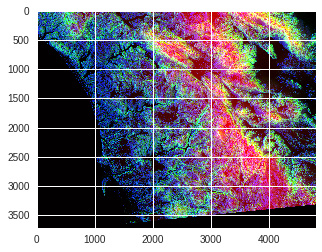

In [14]:
photo_data[150,250] = [0,0,0]
plt.figure(figsize=(5,5))
plt.imshow(photo_data)

Now we'll try to change the colour of the pixel in a range.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """Entry point for launching an IPython kernel.


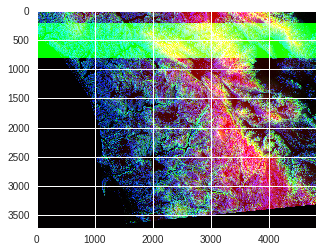

In [15]:
PD = misc.imread('drive/WIFIRE_TEST/wifire/sd-3layers.jpg')
PD[200:800, : ,1] = 255
plt.figure(figsize=(5,5))
plt.imshow(PD)

Pick all Pixels with Low Values

In [16]:
from scipy import misc
photo_data = misc.imread('drive/WIFIRE_TEST/wifire/sd-3layers.jpg') 
print("Shape of photo_data:", photo_data.shape)
low_value_filter = photo_data < 200 
print("Shape of low_value_filter:", low_value_filter.shape)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  


Shape of photo_data: (3725, 4797, 3)
Shape of low_value_filter: (3725, 4797, 3)


Now we'll make all values of those pixel zero whose Red value is under 150.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """Entry point for launching an IPython kernel.


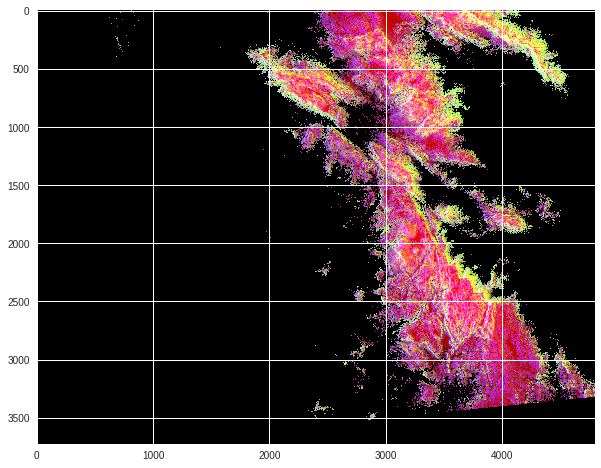

In [17]:
PD = misc.imread('drive/WIFIRE_TEST/wifire/sd-3layers.jpg')
red_mask = PD[ : , : , 0] < 150
PD[red_mask] = 0
plt.figure(figsize=(10,10))
plt.imshow(PD)

Detecting Highly-GREEN Pixels

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """Entry point for launching an IPython kernel.


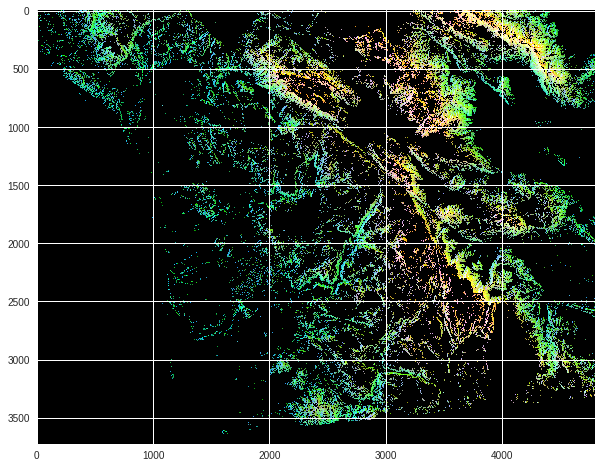

In [18]:
photo_data = misc.imread('drive/WIFIRE_TEST/wifire/sd-3layers.jpg')
green_mask   = photo_data[ : , : ,1] < 150

photo_data[green_mask] = 0
plt.figure(figsize=(10,10))
plt.imshow(photo_data)

Detecting all those pixels where Blue>0

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """Entry point for launching an IPython kernel.


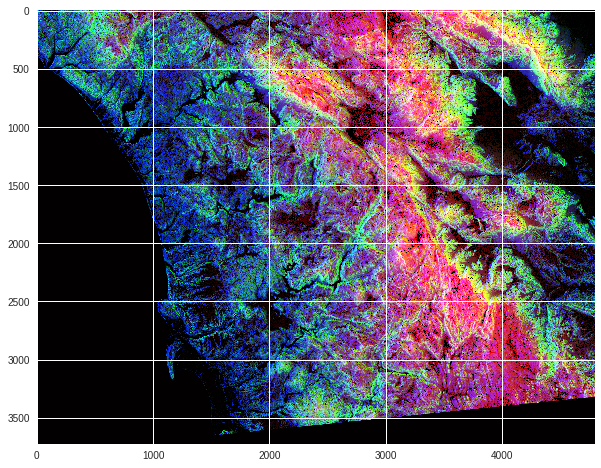

In [19]:
PD = misc.imread('drive/WIFIRE_TEST/wifire/sd-3layers.jpg')
blue_mask = PD[ : , : ,2] == 0
PD[blue_mask] = 0
plt.figure(figsize=(10,10))
plt.imshow(PD)